# 1. Import Libraries

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from pandas import DataFrame
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
print('TF version:', tf.__version__)
print('GPU devices:', tf.config.list_physical_devices('GPU'))

TF version: 2.8.2
GPU devices: []


# 2. Load Data

In [ ]:
# columns used 
columns = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']

# importing the dataset
income = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   header=None,
                   names=columns)
#income.head()
income.info()

In [ ]:
from sklearn.utils import shuffle
df = shuffle(income.values)
X = df[:,0:4]
Y = df[:,4]


In [ ]:
...
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)


# 3. Better Generalization

In [ ]:
def create_dataset():
  """ prepare multi-class classification dataset 
  generating a 2d classification dataset

  Args:

  Return:
    dataset split into train_x, train_y, test_x, test_y
  """
	
  # split into train and test
  n_train = 105
  train_x, test_x = X[:n_train, :], X[n_train:, :]
  train_y, test_y = dummy_y[:n_train], dummy_y[n_train:]

  # format adjust
  train_x = np.asarray(train_x).astype(np.float32)
  train_y = np.asarray(train_y).astype(np.float32)
  test_x = np.asarray(test_x).astype(np.float32)
  test_y = np.asarray(test_y).astype(np.float32)
	
  return train_x, train_y, test_x, test_y

## 3.1 Force Small Weights with Weight Constraints

### 3.1.1 Overfit multilayer perceptron

Train: 1.000, Test: 0.933


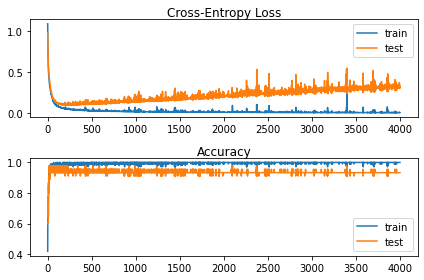

In [ ]:
# prepare dataset
train_x, train_y, test_x, test_y = create_dataset()


# define model
model = Sequential()
model.add(Dense(500, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

### 3.1.2 Overfit MLP With Weight Constraint

Esta restrição é feita através da normalização dos pesos para que a norma deles seja igual a 1.

```python
model.add(Dense(500, input_dim=4, activation='relu', kernel_constraint=unit_norm()))
```

Train: 1.000, Test: 0.933


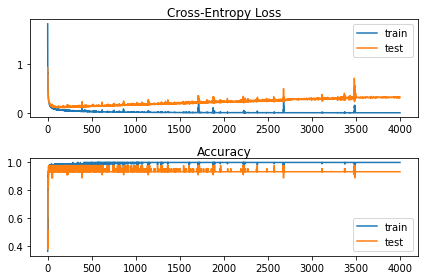

In [ ]:
from tensorflow.keras.constraints import unit_norm

# prepare dataset
train_x, train_y, test_x, test_y = create_dataset()

# define model
model = Sequential()
model.add(Dense(500, input_dim=4, activation='relu', kernel_constraint=unit_norm()))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

## 3.2 Decouple Layers with Dropout

### 3.2.1 MLP with dropout regularization

Aqui é atualizado, incluindo um dropout entre a camada oculta e a camada de saída. Neste exemplo a taxa de dropout é especificada em 40% ou 0.4

```python
# define model
model = Sequential()
model.add(Dense(500, input_dim=4, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
```

Train: 0.990, Test: 0.956


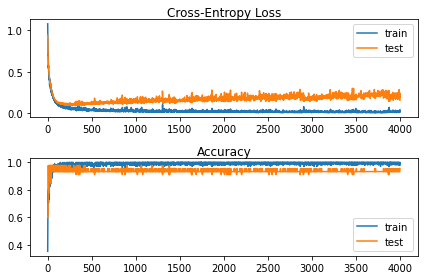

In [ ]:
from tensorflow.keras.layers import Dropout

# prepare dataset
train_x, train_y, test_x, test_y = create_dataset()

# define model
model = Sequential()
model.add(Dense(500, input_dim=4, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()